<a href="https://colab.research.google.com/github/Nickguild1993/Practices_python_ML/blob/main/Stats_BreastCancerDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files

uploaded = files.upload()


Saving breastcancer_data.csv to breastcancer_data.csv


In [3]:
import io

df = pd.read_csv(io.BytesIO(uploaded["breastcancer_data.csv"]))

In [4]:
df.head(4)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN


In [5]:
print(df.shape)

print(df.describe)

(569, 33)
<bound method NDFrame.describe of            id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0      842302         M  ...                  0.11890          NaN
1      842517         M  ...                  0.08902          NaN
2    84300903         M  ...                  0.08758          NaN
3    84348301         M  ...                  0.17300          NaN
4    84358402         M  ...                  0.07678          NaN
..        ...       ...  ...                      ...          ...
564    926424         M  ...                  0.07115          NaN
565    926682         M  ...                  0.06637          NaN
566    926954         M  ...                  0.07820          NaN
567    927241         M  ...                  0.12400          NaN
568     92751         B  ...                  0.07039          NaN

[569 rows x 33 columns]>


***Histogram***

How many times each value appears in the dataset.  Called the distribution of variables.

Histogram is the best way to visualize the distribution of variables- shows the frequency of each value.

ex: [1,1,1,1,2,2,2] - Frequency of (1) is 4 and frequency of (2) is 3.



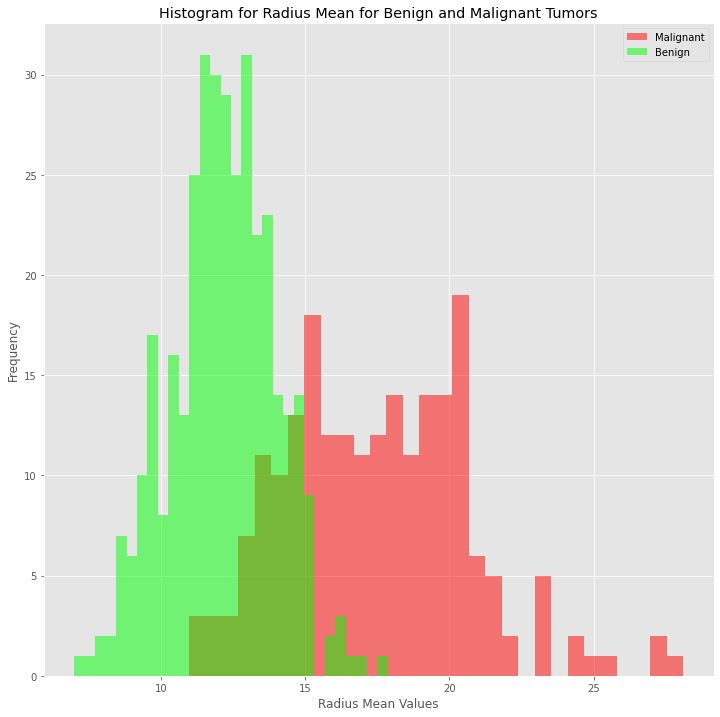

In [8]:
# need to put plt.figure(figsize=(X,X)) BEFORE you configure the graphs, otherwise it won't apply
plt.figure(figsize=(12,12))

m = plt.hist(df[df["diagnosis"] =="M"].radius_mean, bins=30, fc=(1,0,0,0.5), label ="Malignant")
# bins as an integer defines the number of equal width bins in a given range. 
b = plt.hist(df[df["diagnosis"] == "B"].radius_mean,bins=30,fc = (0,1,0,0.5), label = "Benign")


plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram for Radius Mean for Benign and Malignant Tumors")
plt.show()



In [9]:
# Getting the radius mean mean for both malignant and benign tumors

df_malignant_mean = df[df["diagnosis"]== "M"]
print(df_malignant_mean["diagnosis"].value_counts())

print("The mean radius of malignant tumors is:",df_malignant_mean["radius_mean"].mean())

df_benign_mean = df[df["diagnosis"]=="B"]
print(df_benign_mean["diagnosis"].value_counts())

print("The mean radius of benign tumors is:", df_benign_mean["radius_mean"].mean())

M    212
Name: diagnosis, dtype: int64
The mean radius of malignant tumors is: 17.46283018867925
B    357
Name: diagnosis, dtype: int64
The mean radius of benign tumors is: 12.14652380952381


Conclusions from histogram

- Malignant tumors have a larger radius mean (meaning that they're larger)


In [10]:
df_benign_mean.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,3.570000e+02,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.00000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,0.0
mean,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.22038,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442,NaN
std,1.167397e+08,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,0.006747,0.112570,0.58918,0.771169,8.843472,0.003061,0.016352,0.032918,0.005709,0.006999,0.002938,1.981368,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804,NaN
min,8.913000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.051850,0.111500,0.36020,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.009539,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210,NaN
25%,8.746620e+05,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,0.058530,0.207300,0.79590,1.445000,15.260000,0.005212,0.011320,0.010990,0.006433,0.015600,0.002074,12.080000,19.580000,78.270000,447.100000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090,NaN
50%,9.089160e+05,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,0.061540,0.257500,1.10800,1.851000,19.630000,0.006530,0.016310,0.018400,0.009061,0.019090,0.002808,13.350000,22.820000,86.920000,547.400000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120,NaN
75%,8.812816e+06,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,0.065760,0.341600,1.49200,2.388000,25.030000,0.008534,0.025890,0.030560,0.011870,0.024060,0.004174,14.800000,26.510000,96.590000,670.000000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410,NaN
max,9.113205e+08,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,0.095750,0.881100,4.88500,5.118000,77.110000,0.021770,0.106400,0.396000,0.052790,0.061460,0.029840,19.820000,41.780000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600,NaN


In [11]:
# Getting Outliers

df_benign = df_benign_mean
df_malignant = df_malignant_mean

benign_desc = df_benign["radius_mean"].describe()

malignant_desc = df_malignant["radius_mean"].describe()

# [4] & [6] are the indices for 25% and 75% Q1 & Q3
b_q1 = benign_desc[4]
b_q3 = benign_desc[6]
# inter quartile range
b_iqr = b_q3 - b_q1
b_lower_bound = b_q1 - 1.5* b_iqr
b_upper_bound = b_q3 + 1.5* b_iqr

# malignant 
m_q1 = malignant_desc[4]
m_q3 = malignant_desc[6]

# IQR for malignant
m_iqr = m_q3 - m_q1

m_lower_bound = m_q1 - 1.5* m_iqr
m_upper_bound = m_q3 + 1.5* m_iqr

print("Any value outside of this range for benign diagnosis is an outlier: (", b_lower_bound, ",", b_upper_bound,")")
print("Benign Outliers:", df_benign[(df_benign.radius_mean < b_lower_bound) | (df_benign.radius_mean > b_upper_bound)].radius_mean.values)

print("Any value outside of this range for malignant diagnosis is an outlier: (", m_lower_bound, ",", m_upper_bound,")")
print("Malignant Outliers:", df_malignant[(df_malignant.radius_mean < m_lower_bound) | (df_malignant.radius_mean > m_upper_bound)].radius_mean.values)



Any value outside of this range for benign diagnosis is an outlier: ( 7.645000000000001 , 16.805 )
Benign Outliers: [ 6.981 16.84  17.85 ]
Any value outside of this range for malignant diagnosis is an outlier: ( 8.302500000000002 , 26.362499999999997 )
Malignant Outliers: [27.22 28.11 27.42]


***Box Plot***

Can also a box plot to find outliers as well


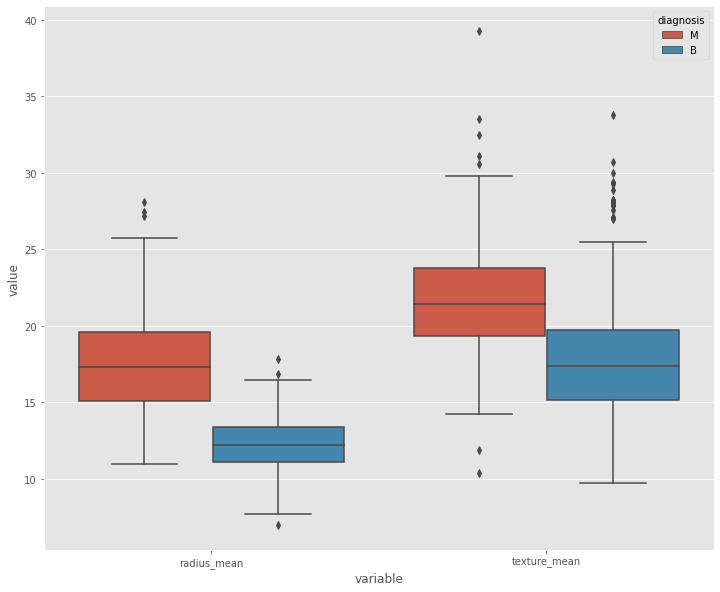

In [12]:
# pd.melt ---> used to transform or reshape data

melted_df = pd.melt(df, id_vars = "diagnosis" , value_vars = ["radius_mean", "texture_mean"])
# id_vars = what column do you want .melt to pivot around **WHAT YOU WANT ON X-AXIS (keep it intact)

plt.figure(figsize=(12,10))

sns.boxplot(x= "variable", y="value", hue="diagnosis", data=melted_df)
plt.show()

In [13]:
melted_df.head(3)


,diagnosis,variable,value
0,M,radius_mean,17.99
1,M,radius_mean,20.57
2,M,radius_mean,19.69


***Summary Statistics***

Mean /
Variance - spread of distribution /
Standard deviation square root of variance

In [14]:
# benign data

print("mean:", df_benign.radius_mean.mean())
print("variance:", df_benign.radius_mean.var())
print("standard deviation:", df_benign.radius_mean.std())
print("describe method:", df_benign.radius_mean.describe())

mean: 12.14652380952381
variance: 3.170221722043872
standard deviation: 1.7805116461410389
describe method: count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64


In [15]:
# malignant data

print("variance:", df_malignant.radius_mean.var())
print("description:", df_malignant.radius_mean.describe())

variance: 10.265430814629346
description: count    212.000000
mean      17.462830
std        3.203971
min       10.950000
25%       15.075000
50%       17.325000
75%       19.590000
max       28.110000
Name: radius_mean, dtype: float64


CDF - Cumulative Distribution Function -> Probability that a variable takes a value less than or equal to x. P(X <= x)



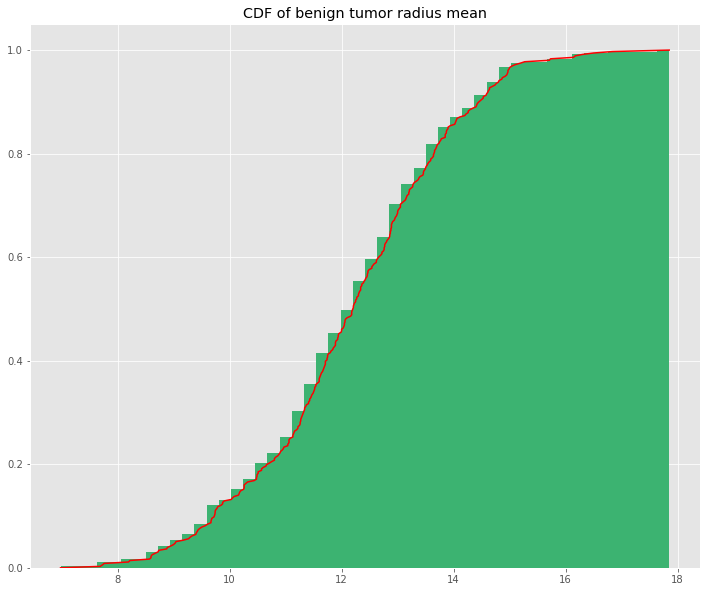

In [22]:
plt.figure(figsize=(12,10))

plt.hist(df_benign.radius_mean, bins = 50, color = "Mediumseagreen",label="benign", density=1, cumulative=True)

sorted_df = np.sort(df_benign.radius_mean)
y = np.arange(len(sorted_df))/float(len(sorted_df)-1)
plt.plot(sorted_df, y, color= "red")
plt.title ("CDF of benign tumor radius mean")
plt.show()


**Visualizing the relationship between variables**

utilizing a scatterplot

Checking relationship bewteen radius mean and area mean (likely a ~ strong positive relationship)

<Figure size 1152x864 with 0 Axes>

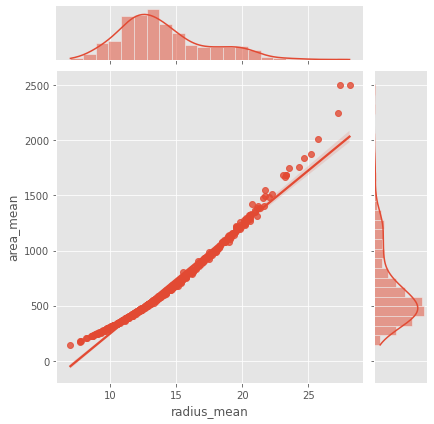

In [25]:
plt.figure(figsize=(16,12))

sns.jointplot(df.radius_mean, df.area_mean, kind="reg")
plt.show()


<Figure size 864x720 with 0 Axes>

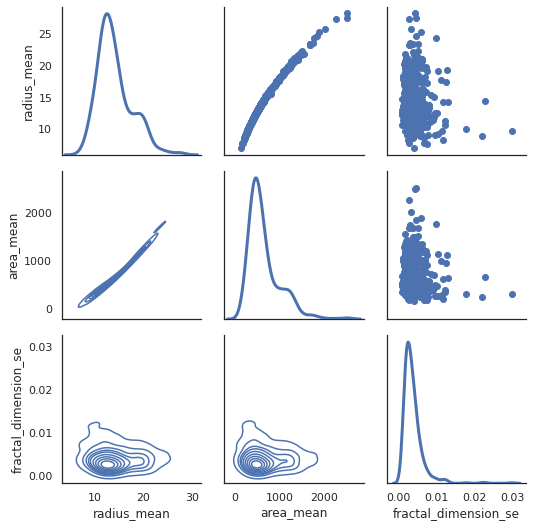

In [29]:
# Checking relationship between between multiple features
plt.figure(figsize=(12,10))
sns.set(style="white")
df_set = df.loc[:,["radius_mean", "area_mean", "fractal_dimension_se"]]
g = sns.PairGrid(df_set, diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot,lw=3)
plt.show()
